Upload an image:


Saving 12.jpeg to 12.jpeg


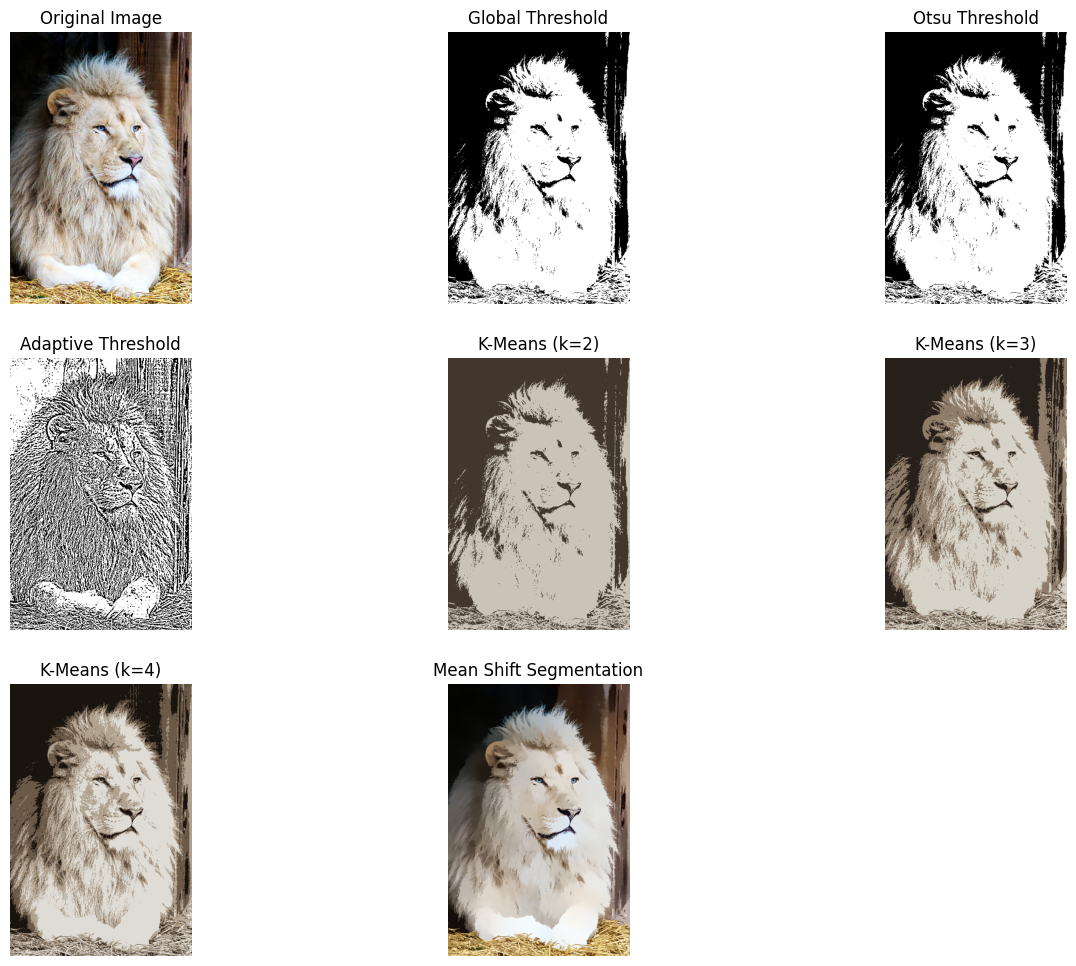

In [1]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Upload an image:")
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

img_color = cv2.imread(image_name)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


_, global_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)


_, otsu_thresh = cv2.threshold(
    img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)


adaptive_thresh = cv2.adaptiveThreshold(
    img_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

def kmeans_segmentation(image, k):
    Z = image.reshape((-1,3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    segmented = centers[labels.flatten()]
    return segmented.reshape(image.shape)

k2 = kmeans_segmentation(img_color, 2)
k3 = kmeans_segmentation(img_color, 3)
k4 = kmeans_segmentation(img_color, 4)


mean_shift = cv2.pyrMeanShiftFiltering(img_color, sp=20, sr=40)


titles = [
    "Original Image",
    "Global Threshold",
    "Otsu Threshold",
    "Adaptive Threshold",
    "K-Means (k=2)",
    "K-Means (k=3)",
    "K-Means (k=4)",
    "Mean Shift Segmentation"
]

images = [
    img_color,
    global_thresh,
    otsu_thresh,
    adaptive_thresh,
    k2,
    k3,
    k4,
    mean_shift
]

plt.figure(figsize=(16,12))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()